In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

**EXERCISE 1.** The hourly wages in a particular industry are normally distributed with mean \$13.20 and standard deviation \$2.50. A company in this industry employs 40 workers, paying them an average of \$12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [7]:
xbar = 13.20
sigma = 2.50
n = 40
mu = 12.20
alpha = 0.01

In [ ]:
# H0 : mu = 13.20
# H1 : mu < 13.20

In [8]:
z_test = (xbar - mu) / (sigma/np.sqrt(n))
p_value = 1- stats.norm.cdf(z_test)
print(f"statistic: {z_test}, p-value: {p_value}")

statistic: 2.5298221281347035, p-value: 0.005706018193000872


In [9]:
if p_value<alpha:
    print(f"At {alpha} level of significance, we can reject the null hypothesis.")
else:
    print(f"'At {alpha} level of significance, we fail to reject the null hypothesis.")

At 0.01 level of significance, we can reject the null hypothesis.


**EXERCISE 2.**Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [ ]:
# H0 : soils not differ with respect to average shear strength
# H1 : soils differ with respect to average shear strength

In [52]:
soil = pd.read_csv("soil.csv")

In [44]:
soil.sample(3)

,Soil1,Soil2
3,1.912,1.828
4,1.553,1.371
8,1.685,1.589


In [49]:
soil.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil1,30.0,1.691800,0.206903,1.110,1.572,1.675,1.86525,2.054
Soil2,35.0,1.417114,0.219184,1.053,1.231,1.379,1.55900,1.878


In [53]:
#option1 Fill NaN value with their columns mean value

soil.Soil1.fillna(soil.Soil1.mean(), inplace=True)

In [54]:
indTest1 = stats.ttest_ind(soil.Soil1, soil.Soil2)
indTest1

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [58]:
indTest2 = stats.ttest_ind(soil.Soil1, soil.Soil2, nan_policy= "omit")
indTest2

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [56]:
if indTest1.pvalue < alpha:
    print("Reject the Null, soils differ with respect to average shear strength")
else:
    print("Fail to reject")

Reject the Null


In [60]:
if indTest2.pvalue < alpha:
    print("Reject the Null, soils differ with respect to average shear strength")
else:
    print("Fail to reject")

Reject the Null, soils differ with respect to average shear strength


**EXERCISE 3.** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [64]:
pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [67]:
pisa.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
59,SGP,AS,79.012957,564.1897,535.1002,555.5747
15,CZE,EU,75.668839,492.3254,487.2501,492.8300
56,QAT,AS,92.884826,402.4007,401.8874,417.6112
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [69]:
pisa.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [66]:
pisa.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [74]:
pisa_as_eu = pisa.loc[(pisa["Continent_Code"] == "EU") | (pisa["Continent_Code"] == "AS")]

In [76]:
pisa_as_eu.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
47,MLT,EU,76.184000,478.6448,446.6661,464.7819
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
9,CHE,EU,87.479056,521.2506,492.1982,505.5058
40,LTU,EU,71.378000,478.3834,472.4066,475.4089
28,HRV,EU,69.803100,464.0401,486.8632,475.3912


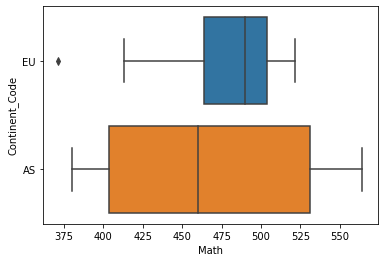

In [80]:
sns.boxplot(x = pisa_as_eu.Math, y = pisa_as_eu.Continent_Code);

In [81]:
pisa_as_eu.groupby("Continent_Code")["Math"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AS,17.0,466.216647,64.356490,380.2590,403.8332,459.8160,531.2961,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.0401,489.7287,503.7220,521.2506


In [82]:
stats.ttest_ind(pisa_as_eu[pisa_as_eu["Continent_Code"]=="EU"]["Math"], pisa_as_eu[pisa_as_eu["Continent_Code"]=="AS"]["Math"],equal_var = True)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

**EXERCISE 4.** A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test. Weight Dataset

In [ ]:
#H0 : exercise and diet program have an impact on customers' weight loss
#H1 : exercise and diet program have not an impact on customers' weight loss

In [98]:
weight = pd.read_csv("weight.csv")

In [99]:
weight.sample(5)

,ID,starting,ending
6,7.0,76.0,70.0
7,8.0,81.0,80.0
3,4.0,71.0,71.0
1,2.0,81.0,82.0
0,1.0,76.0,72.0


In [100]:
weight.info

<bound method DataFrame.info of       ID  starting  ending
0    1.0      76.0    72.0
1    2.0      81.0    82.0
2    3.0      86.0    84.0
3    4.0      71.0    71.0
4    5.0      88.0    83.0
5    6.0      78.0    74.0
6    7.0      76.0    70.0
7    8.0      81.0    80.0
8    9.0      79.0    78.0
9   10.0      77.0    79.0
10  11.0      83.0    80.0
11  12.0      77.0    76.0
12  13.0      79.0    77.0
13  14.0      81.0    83.0
14  15.0      83.0    82.0
15   NaN       NaN     NaN>

In [104]:
weight = weight.loc[:14]

In [105]:
stats.ttest_rel(weight.starting, weight.ending, alternative='greater')

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)